Topic : Predict if Client will subscribe to direct marketing campaign for a banking institution

Summary :
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

## 1. Univariate and Bivariate Analysis

## Y(has the client subscribed a term deposit?) (binary: 'yes','no')

In [52]:
df_y = df['y'].value_counts()
print 'Percentage of Y=yes:',(df_y[1] / float(df_y[0] + df_y[1])) * 100

Percentage of Y=yes: 11.2654171118


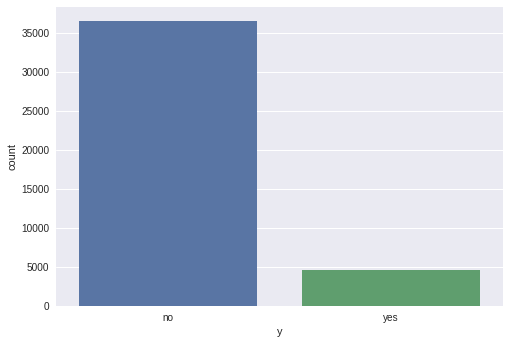

In [53]:
sns.countplot(df['y'])
plt.show()

# Take Aways:
1. We can clearly see that the target variable(subscribed) is imbalanced. We must deal with this imbalance during model building

## Month
Last Contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

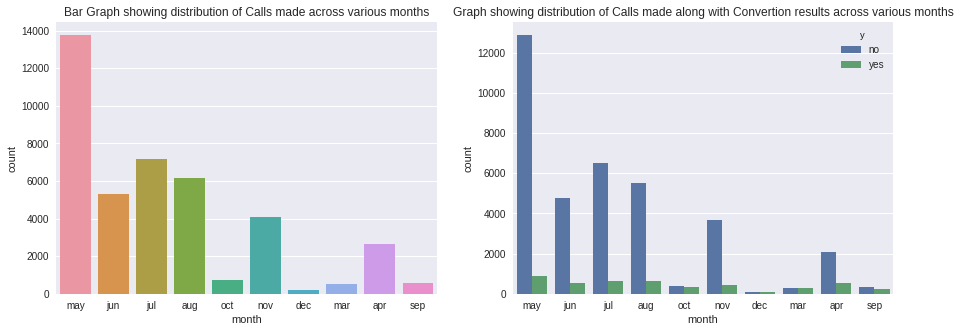

In [4]:
#Distribution of variable month
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['month'])
plt.title('Bar Graph showing distribution of Calls made across various months')

plt.subplot(1,2,2)
sns.countplot(x="month", hue="y", data=df);
plt.title('Graph showing distribution of Calls made along with Convertion results across various months')
            
plt.show()

In [5]:
df_months = pd.crosstab(index=df['month'],columns=df['y'])
df_months['percentage(yes)'] = (df_months['yes'] / (df_months['yes'] + df_months['no'])) * 100
df_months.head()

y,no,yes,percentage(yes)
month,,,
apr,2093,539,20.478723
aug,5523,655,10.602137
dec,93,89,48.901099
jul,6525,649,9.046557
jun,4759,559,10.511470


# Take Aways:
1. We can clearly see that the users are usually contacted more in May-June-July-Aug
2. Having said that the outcome(Person subscribing) really is not dependent on the month they were last called in 

## Day of week
Last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

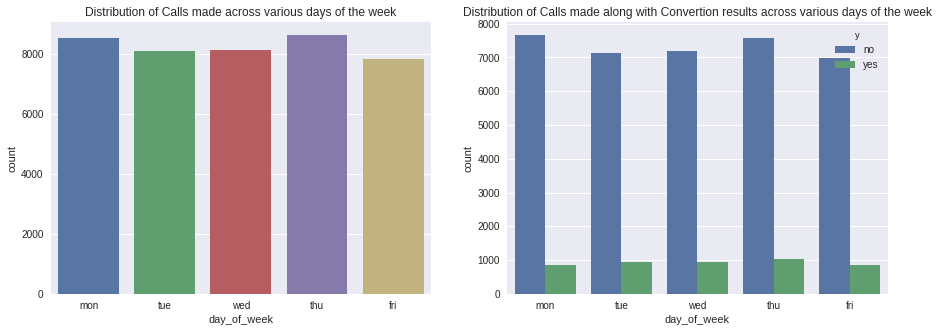

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['day_of_week'])
plt.title('Distribution of Calls made across various days of the week')

plt.subplot(1,2,2)
sns.countplot(x="day_of_week", hue="y", data=df);
plt.title('Distribution of Calls made along with Convertion results across various days of the week')

plt.show()

In [7]:
df_days = pd.crosstab(index=df['day_of_week'],columns=df['y'])
df_days['percentage(yes)'] = (df_days['yes'] / (df_days['yes'] + df_days['no'])) * 100
df_days.head()

y,no,yes,percentage(yes)
day_of_week,,,
fri,6981,846,10.808739
mon,7667,847,9.948320
thu,7578,1045,12.118752
tue,7137,953,11.779975
wed,7185,949,11.667076


# Take Aways:
1. There's no trend as such in the days of week as the number of calls made based on day is uniform
2. There's an equal chance/prob of a person subscribing accros every day of the week

## Duration:
last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [8]:
#Distribution of variable day of week
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)

plt.hist(df['duration'],bins=[0,100,200,300,400,500,1000,1500,2000])
plt.title('Histogram of Call duration')
plt.xlim(0,2500)

plt.subplot(1,2,2)
sns.boxplot(x='y',y='duration',data=df)

plt.title('Distribution of Call duration(in secs) vs Subscribed')

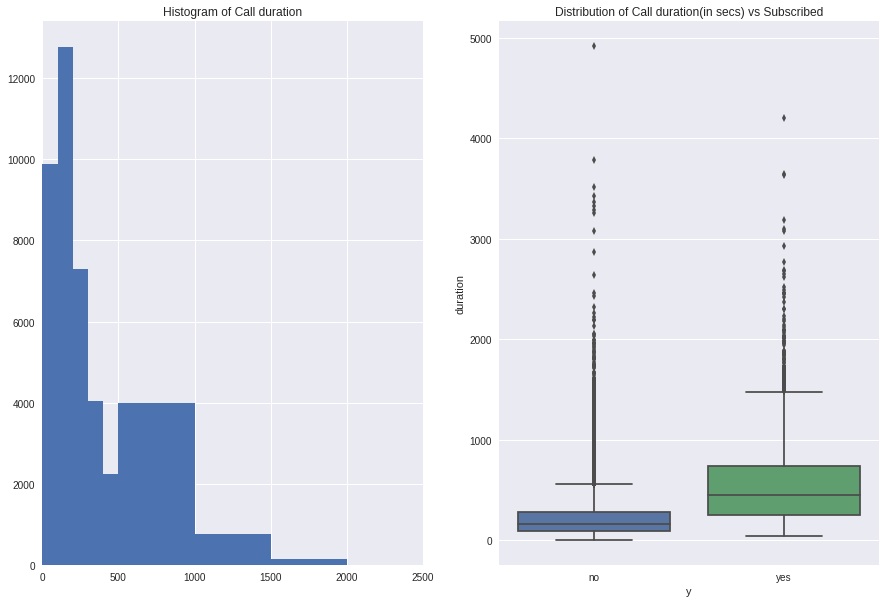

In [9]:
plt.show()

In [10]:
df[df['duration'] == 0]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


<b>NOTE:</b> We only have 4 datapoints with duration = 0 which means these people were contacted first time
These 4 data points should be removed before model training, as the duration is not known

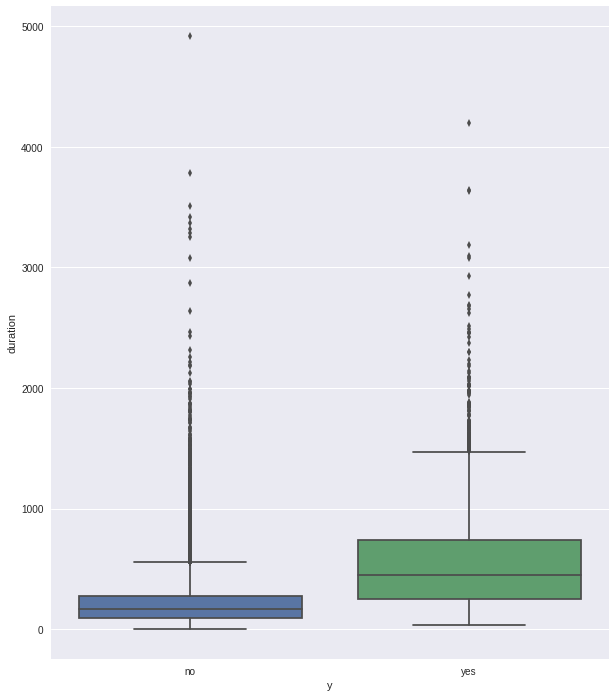

In [11]:
new_data = df[df['duration'] != 0]
#Let's see if there is still any trend in coversion based on duration after removing duration = 0, data points
plt.figure(figsize=(10,12))
sns.boxplot(x='y',y='duration',data=new_data)
plt.show()

# Take Aways:
1. Most number of calls last between 0-200 secs
2. There's a clear trend showing the chances of person subscribing increases once the duration goes above 300 secs

## Campaign
Number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [12]:
#Distribution of variable day of week
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.hist(df['campaign'])
plt.title('Distribution of Calls made during a campaign')

camp_less_than_20 = df[df['campaign'] < 20]
plt.subplot(1,2,2)
sns.countplot(x="campaign", hue="y", data=camp_less_than_20);

plt.title('Distribution of Calls made during a campaign vs Subscribed')

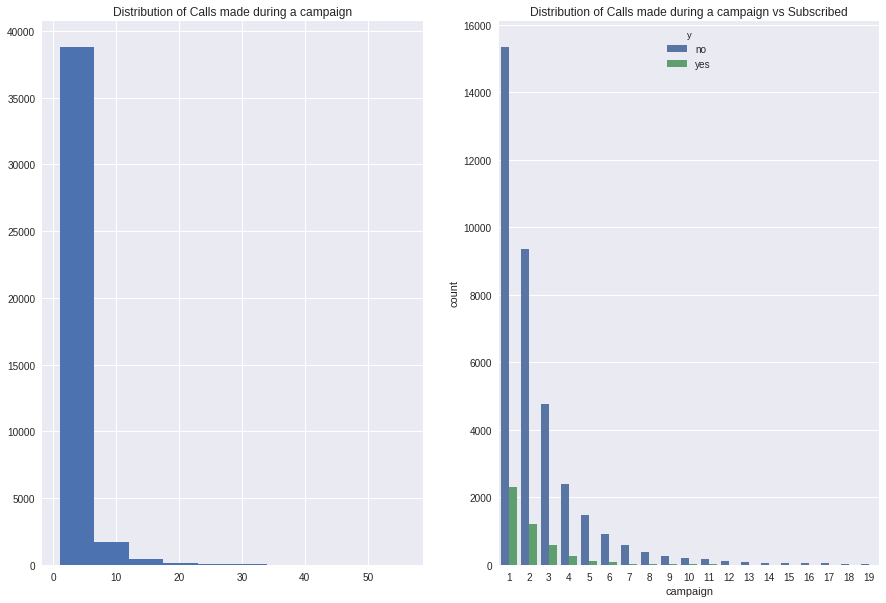

In [13]:
plt.show()

In [14]:
df_campaign = pd.crosstab(index=camp_less_than_20['campaign'],columns=camp_less_than_20['y'])
df_campaign['percentage(yes)'] = (df_campaign['yes'] / (df_campaign['yes'] + df_campaign['no'])) * 100
df_campaign.head()

y,no,yes,percentage(yes)
campaign,,,
1,15342,2300,13.037071
2,9359,1211,11.456954
3,4767,574,10.747051
4,2402,249,9.392682
5,1479,120,7.504690


# Take Aways:
1. Number of the calls performed to a single person during a campaign are between 0-10 on average
2. Even though most of the people are subscribing in the very first call during a campaign, their percentage conversion is quite low. 2k  subscribing out of 17k. Conversion percentage is higher 2 to 5.
If a person is contacted more than 10 times then the signal is quite clear that he is not going to subscribe

## Age
Age of person (numeric)

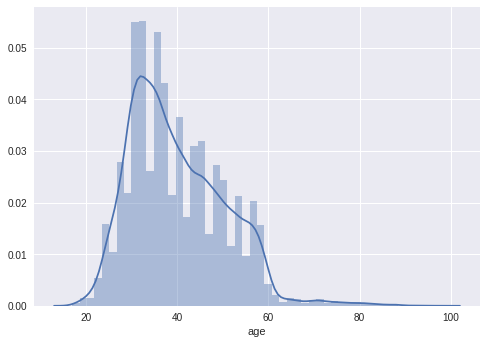

In [15]:
sns.distplot(df['age'])
plt.show()

# Take Aways:
1. The distribution of age looks slightly skewed towards the right side
2. This doesn't mean they are outlier since we saw that their occupation is retired

## Marital
Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

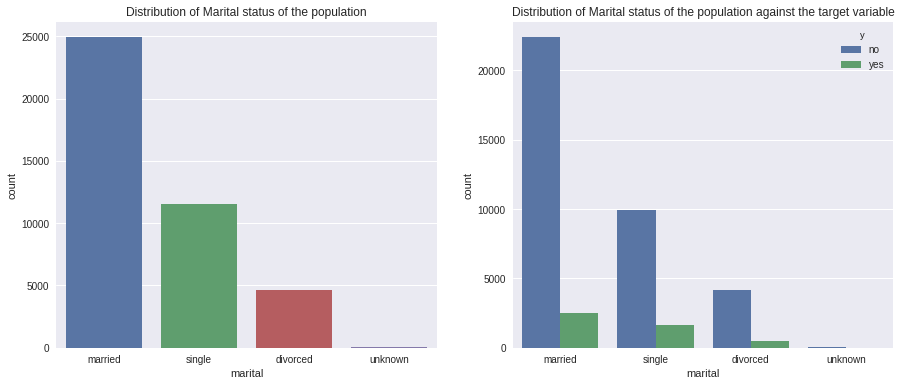

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df['marital'])
plt.title('Distribution of Marital status of the population')

plt.subplot(1,2,2)
sns.countplot(x="marital", hue="y", data=df)
plt.title('Distribution of Marital status of the population against the target variable')

plt.show()

In [17]:
df_marital = pd.crosstab(index=df['marital'],columns=df['y'])
df_marital['percentage(yes)'] = (df_marital['yes'] / (df_marital['yes'] + df_marital['no'])) * 100
df_marital

y,no,yes,percentage(yes)
marital,,,
divorced,4136,476,10.320902
married,22396,2532,10.157253
single,9948,1620,14.004149
unknown,68,12,15.000000


# Take Aways:
1. Looking at the above plots we can see some folks have marital status as unknown. We should be handling this 'unknowns'
if possible.

## poutcome:
Outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

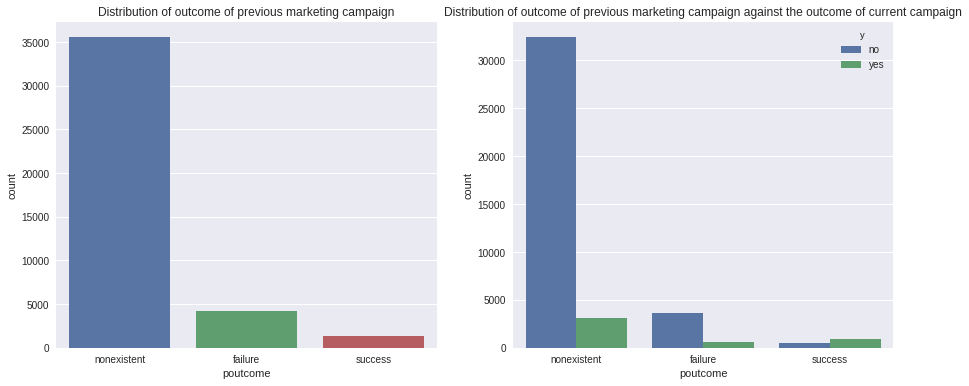

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df['poutcome'])
plt.title('Distribution of outcome of previous marketing campaign')

plt.subplot(1,2,2)
sns.countplot(x="poutcome", hue="y", data=df)
plt.title('Distribution of outcome of previous marketing campaign against the outcome of current campaign')

plt.show()

In [19]:
df_outcome = pd.crosstab(index=df['poutcome'],columns=df['y'])
df_outcome['percentage(yes)'] = (df_outcome['yes'] / (df_outcome['yes'] + df_outcome['no'])) * 100
df_outcome

y,no,yes,percentage(yes)
poutcome,,,
failure,3647,605,14.228598
nonexistent,32422,3141,8.832213
success,479,894,65.112891


# Take Aways:
1. The non-existent ones in the first plot means they were not contacted in the previous campaign
2. In the second plot, we have managed to convert some nonexistent ones(green). These are our new customers for this campaign)
3. Also, we can say that there are some folks who have said no in the previous campaign but we have still managed to convince 14% of them and vice versa.

## Contact:
Contact communication type (categorical: 'cellular','telephone') 

In [20]:
df_calls = pd.crosstab(index=df['contact'],columns=df['y'])
df_calls['percentage(yes)'] = (df_calls['yes'] / (df_calls['yes'] + df_calls['no'])) * 100
df_calls

y,no,yes,percentage(yes)
contact,,,
cellular,22291,3853,14.737607
telephone,14257,787,5.231321


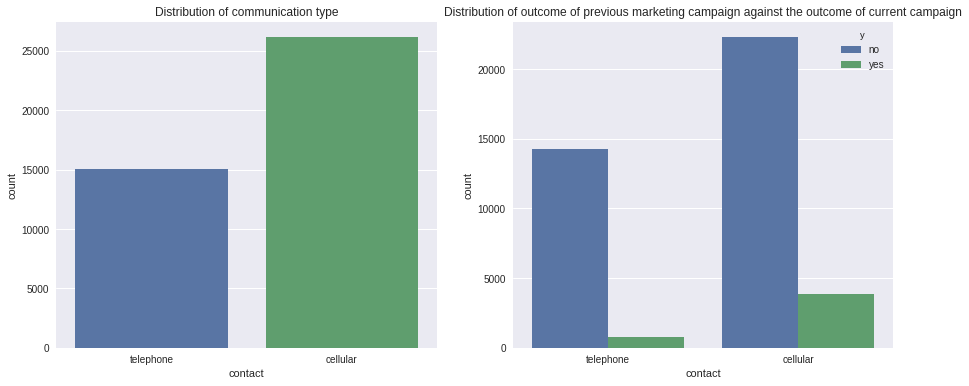

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df['contact'])

plt.title('Distribution of communication type')

plt.subplot(1,2,2)
sns.countplot(x="contact", hue="y", data=df)
plt.title('Distribution of outcome of previous marketing campaign against the outcome of current campaign')
plt.show()

# Take Aways:
1. More people are called on cell the average age of the poulation is 40 as seen by the the age distribution above
2. It makes more sense in the next campaign to call people on cellphones(if they have both) more since the conversion rate in much higher in that case.

In [22]:
print df['age'].mean()
print df['age'].median()

40.0240604059
38.0


## Data Cleaning

In [23]:
df.loc[(df['marital']  == 'unknown') & (df['age']  >= 40), 'marital'] = 'married'
df.loc[(df['marital']  == 'unknown') & (df['age']  < 40), 'marital'] = 'single'

In [24]:
df_1 = pd.crosstab(index=df['job'],columns=df['education'])
df_1

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [25]:
df_unskilled = df[(df.job == 'blue-collar') | (df.job == 'housemaid')]
df_service = df[(df.job == 'admin.') | (df.job == 'services') | (df.job == 'technician')]
df_professional = df[(df.job == 'entrepreneur') | (df.job == 'self-employed') | (df.job == 'management')]
df_student = df[(df.job == 'student')]
df_retired = df[(df.job == 'retired')]
df_unemployed = df[(df.job == 'unemployed')]

In [26]:
df.loc[df_unskilled.index, 'job'] = 'Unskilled'
df.loc[df_service.index, 'job'] = 'Service'
df.loc[df_professional.index, 'job'] = 'Professional'
df.loc[df_student.index, 'job'] = 'Student'
df.loc[df_retired.index, 'job'] = 'Retired'
df.loc[df_unemployed.index, 'job'] = 'Unemployed'

In [27]:
df['job'].unique()

array(['Unskilled', 'Service', 'Retired', 'Professional', 'Unemployed',
       'unknown', 'Student'], dtype=object)

In [28]:
df_job2 = pd.crosstab(index=df_service.job,columns=df_service.education)
df_job2.loc['total'] = df_job2.iloc[:,:].sum()
df_job2

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
services,132,226,388,2682,0,218,173,150
technician,58,87,384,873,0,3320,1809,212
total,267,464,1271,6884,1,3901,7735,611


In [29]:
df_job1 = pd.crosstab(index=df_unskilled.job,columns=df_unskilled.education)
df_job1.loc['total'] = df_job1.iloc[:,:].sum()
df_job1

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
blue-collar,2318,1426,3623,878,8,453,94,454
housemaid,474,77,94,174,1,59,139,42
total,2792,1503,3717,1052,9,512,233,496


In [30]:
df_edu = pd.crosstab(index=df.job,columns=df.education)
df_edu.loc['total'] = df_edu.iloc[:,:].sum()
df_edu

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
Professional,330,181,596,650,5,392,3438,209
Retired,597,75,145,276,3,241,285,98
Service,267,464,1271,6884,1,3901,7735,611
Student,26,13,99,357,0,43,170,167
Unemployed,112,34,186,259,0,142,262,19
Unskilled,2792,1503,3717,1052,9,512,233,496
unknown,52,22,31,37,0,12,45,131
total,4176,2292,6045,9515,18,5243,12168,1731


In [31]:
df_basic_ed = df[(df.education == 'basic.4y') | (df.education == 'basic.6y') | (df.education == 'illiterate')]
df_mid_ed = df[(df.education == 'basic.9y') | (df.education == 'high.school')]
df_degree_ed = df[(df.education == 'professional.course') | (df.education == 'university.degree')]

In [32]:
df.loc[df_basic_ed.index, 'education'] = 'Basic'
df.loc[df_mid_ed.index, 'education'] = 'Mid'
df.loc[df_degree_ed.index, 'education'] = 'Degree'

In [33]:
df['education'].value_counts()

Degree     17411
Mid        15560
Basic       6486
unknown     1731
Name: education, dtype: int64

In [34]:
pd.crosstab(index=df.job,columns=df.education)

education,Basic,Degree,Mid,unknown
job,,,,
Professional,516,3830,1246,209
Retired,675,526,421,98
Service,732,11636,8155,611
Student,39,213,456,167
Unemployed,146,404,445,19
Unskilled,4304,745,4769,496
unknown,74,57,68,131


In [35]:
drop_index = df[(df.job == 'unknown') & (df.education == 'unknown')]['y'].index
print len(drop_index)

131


In [36]:
df_new = df.drop(drop_index,axis=0)

In [37]:
pd.crosstab(index=df_new.job,columns=df_new.education)

education,Basic,Degree,Mid,unknown
job,,,,
Professional,516,3830,1246,209
Retired,675,526,421,98
Service,732,11636,8155,611
Student,39,213,456,167
Unemployed,146,404,445,19
Unskilled,4304,745,4769,496
unknown,74,57,68,0


In [38]:
df1 = df_new[(df_new.job == 'unknown') & (df_new.education == 'Basic')].index.values
df2 = df_new[(df_new.job == 'unknown') & (df_new.education == 'Degree')].index.values
df3 = df_new[(df_new.job == 'unknown') & (df_new.education == 'Mid')].index.values

df_new.loc[df1, 'job'] = 'Unskilled'
df_new.loc[df2, 'job'] = 'Service'
df_new.loc[df3, 'job'] = 'Service'

In [39]:
df_new[(df_new.job == 'unknown') & (df_new.education == 'Basic')]['job'].index.values

array([], dtype=int64)

In [40]:
pd.crosstab(index=df_new.job,columns=df_new.education)

education,Basic,Degree,Mid,unknown
job,,,,
Professional,516,3830,1246,209
Retired,675,526,421,98
Service,732,11693,8223,611
Student,39,213,456,167
Unemployed,146,404,445,19
Unskilled,4378,745,4769,496


In [41]:
df4 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Professional')].index.values
df5 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Retired')].index.values
df6 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Service')].index.values
df7 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Student')].index.values
df8 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Unemployed')].index.values
df9 = df_new[(df_new.education == 'unknown') & (df_new.job == 'Unskilled')].index.values

df_new.loc[df4, 'education'] = 'Degree'
df_new.loc[df5, 'education'] = 'Basic'
df_new.loc[df6, 'education'] = 'Degree'
df_new.loc[df7, 'education'] = 'Mid'
df_new.loc[df8, 'education'] = 'Mid'
df_new.loc[df9, 'education'] = 'Mid'

In [42]:
pd.crosstab(index=df_new.job,columns=df_new.education)

education,Basic,Degree,Mid
job,,,
Professional,516,4039,1246
Retired,773,526,421
Service,732,12304,8223
Student,39,213,623
Unemployed,146,404,464
Unskilled,4378,745,5265


In [43]:
pd.crosstab(index=df_new.loan,columns=df_new.education)

education,Basic,Degree,Mid
loan,,,
no,5427,14979,13433
unknown,181,420,387
yes,976,2832,2422


In [44]:
pd.crosstab(index=df_new.loan,columns=df_new.job)

job,Professional,Retired,Service,Student,Unemployed,Unskilled
loan,,,,,,
no,4814,1436,17455,710,838,8586
unknown,147,44,478,23,27,269
yes,840,240,3326,142,149,1533


In [45]:
df_new.to_csv('modified.csv')